In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
os.sys.path.append('../')
from utilities import *
from astropy.convolution import convolve, Gaussian1DKernel

%load_ext autoreload
%autoreload 2

%matplotlib inline

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [75]:
# find sessions from single mouse on TwoTower_noTimeout with datestring earlier than or equal to first timeout day
# num rewards greater than 
df = load_session_db()
ca1mice = ['4139190.1','4139190.3', '4054011.1']
dgmice = ['4054010.4','4054010.5']

df = df[df['RewardCount']>15]
#df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])


4139190.1
     MouseName  DateFolder  SessionNumber               Track  RewardCount  \
213  4139190.1  15_06_2018              1  TwoTower_noTimeout           56   
214  4139190.1  15_06_2018              2  TwoTower_noTimeout           40   
212  4139190.1  15_06_2018              3  TwoTower_noTimeout           48   
153  4139190.1  16_06_2018              1  TwoTower_noTimeout           30   
151  4139190.1  16_06_2018              2  TwoTower_noTimeout           59   

     Imaging   DateTime                                          data file  \
213        1 2018-06-15  G:\My Drive\\VR_Data\TwoTower\4139190.1\15_06_...   
214        0 2018-06-15  G:\My Drive\\VR_Data\TwoTower\4139190.1\15_06_...   
212        1 2018-06-15  G:\My Drive\\VR_Data\TwoTower\4139190.1\15_06_...   
153        0 2018-06-16  G:\My Drive\\VR_Data\TwoTower\4139190.1\16_06_...   
151        1 2018-06-16  G:\My Drive\\VR_Data\TwoTower\4139190.1\16_06_...   

                                              scanfi

C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:612: RuntimeWarning: invalid value encountered in true_divide
  rzone_lick_ratio[m] = np.divide(zone0_lick_rate,zone0_lick_rate+zone1_lick_rate)


4139190.3
     MouseName  DateFolder  SessionNumber               Track  RewardCount  \
234  4139190.3  15_06_2018              1  TwoTower_noTimeout           57   
236  4139190.3  15_06_2018              2  TwoTower_noTimeout           35   
233  4139190.3  15_06_2018              3  TwoTower_noTimeout           45   
235  4139190.3  15_06_2018              4  TwoTower_noTimeout           38   
262  4139190.3  16_06_2018              1  TwoTower_noTimeout           52   
263  4139190.3  16_06_2018              2  TwoTower_noTimeout          111   
293  4139190.3  17_06_2018              1  TwoTower_noTimeout           41   
292  4139190.3  17_06_2018              2  TwoTower_noTimeout          109   
247  4139190.3  18_06_2018              1  TwoTower_noTimeout           19   

     Imaging   DateTime                                          data file  \
234        1 2018-06-15  G:\My Drive\\VR_Data\TwoTower\4139190.3\15_06_...   
236        0 2018-06-15  G:\My Drive\\VR_Data\TwoTowe

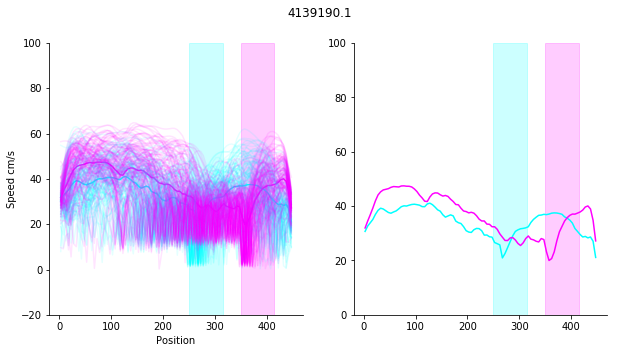

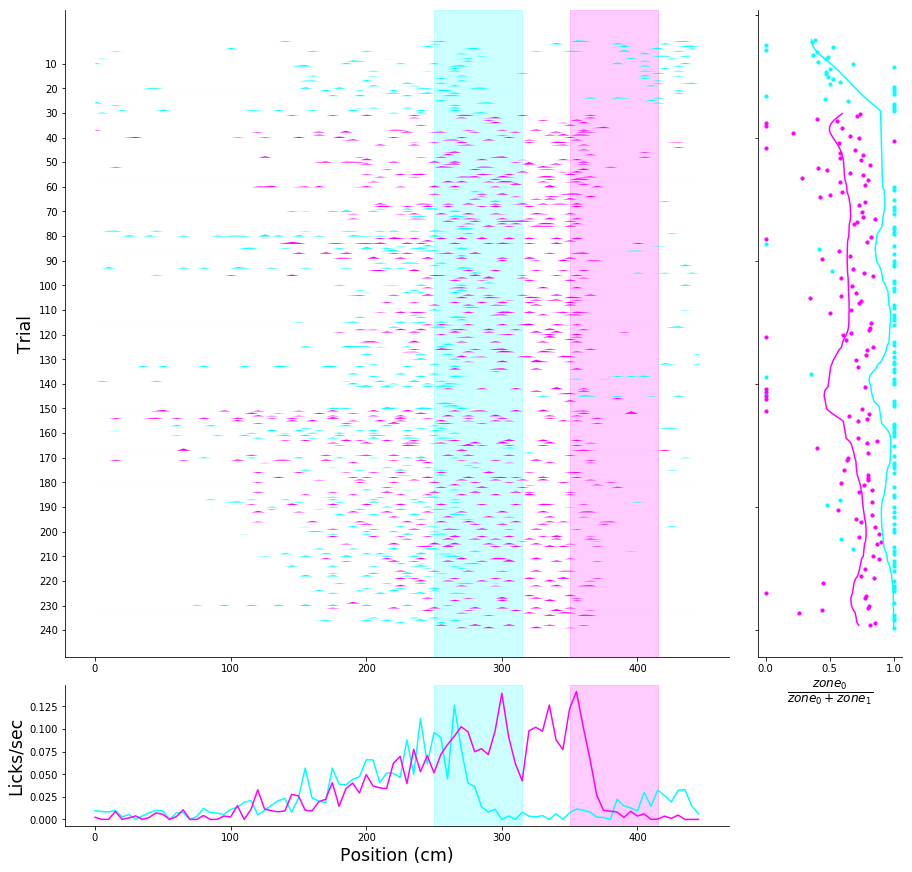

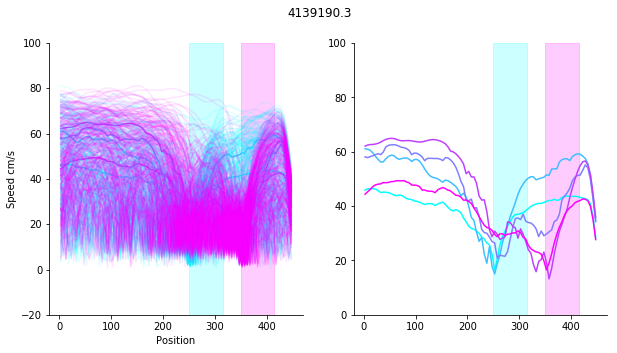

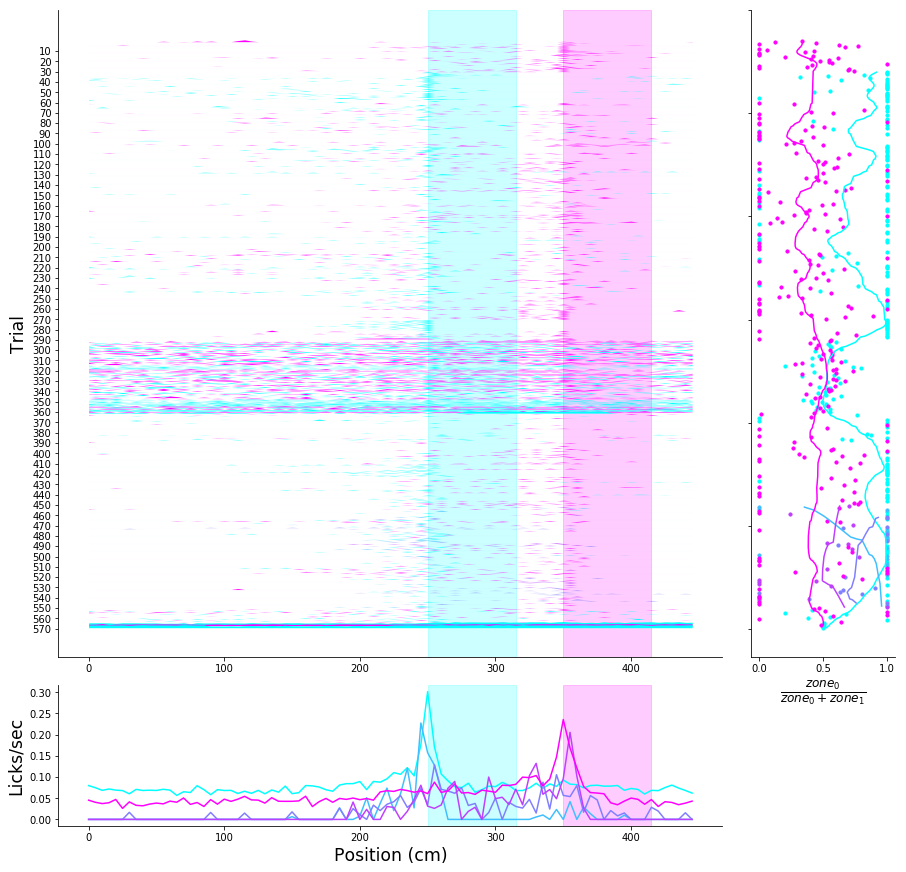

In [56]:
for mouse in ['4139190.1','4139190.3']:
    print(mouse)
    # no timeeout 
    df_noTO = df[df['Track']=='TwoTower_noTimeout']
    df_noTO = df_noTO[df_noTO['MouseName'].str.match(mouse)]
    #df_noTO = df_noTO.iloc[:7,:]
    df_noTO = df_noTO[df_noTO['DateTime']<'2018-06-19']
    print(df_noTO)
    # concatenate all files
    data_noTOs = behavior_dataframe([df_noTO['data file'].iloc[i] for i in range(df_noTO.shape[0])],concat=True)

    trial_mat, bin_edges, bin_centers = make_pos_bin_trial_matrices(data_noTOs[['speed','morph','lick rate','reward','lick']]._values,
                                                          data_noTOs['pos']._values,
                                                          data_noTOs['tstart']._values,
                                                          data_noTOs['teleport']._values,bin_size=5)



    morph_vec,count = sp.stats.mode(trial_mat[:,:,1],axis=1,nan_policy='propagate')
    morph_vec = np.squeeze(morph_vec)

     # speed vs position
    speed_dict = trial_type_dict(trial_mat[:,:,0],morph_vec)

    f,ax = plot_speed(bin_centers,speed_dict,morph_vec)
    f.suptitle(mouse)
    f.savefig("G:\My Drive\CommitteeMeeting8_18\\Behavior\\noTOLicks\\%s_noTO_speed.png" % mouse , fomat = 'png')

    # plot licking behavior 
    lick_dict = trial_type_dict(trial_mat[:,:,4],morph_vec)
    lick_mat = np.squeeze(trial_mat[:,:,2])
    lick_mat_norm = lick_dict['all']/np.amax(lick_dict['all'])
    lick_norm_dict = trial_type_dict(lick_mat_norm,morph_vec)
    fig,axes = lick_plot(lick_dict,bin_edges,smooth=False,ratio=True)
    fig.savefig("G:\\My Drive\\CommitteeMeeting8_18\\Behavior\\noTOLicks\\%s_noTOLickRate.png" % mouse,format ='png')

In [37]:
print(data_noTOs.shape)

(143770, 15)


4054011.2
     MouseName  DateFolder  SessionNumber             Track  RewardCount  \
327  4054011.2  14_06_2018              1  TwoTower_Timeout           92   
340  4054011.2  15_06_2018              1  TwoTower_Timeout           45   
342  4054011.2  15_06_2018              2  TwoTower_Timeout           47   
341  4054011.2  15_06_2018              3  TwoTower_Timeout           50   
329  4054011.2  18_06_2018              1  TwoTower_Timeout          198   
339  4054011.2  19_06_2018              1  TwoTower_Timeout          169   
320  4054011.2  21_06_2018              1  TwoTower_Timeout          145   
323  4054011.2  24_06_2018              1  TwoTower_Timeout          121   
322  4054011.2  28_06_2018              1  TwoTower_Timeout          136   
334  4054011.2  08_07_2018              1  TwoTower_Timeout           58   
336  4054011.2  09_07_2018              1  TwoTower_Timeout           90   
2    4054011.2  10_07_2018             16  TwoTower_Timeout          146   
36

C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:479: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:478: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])


4054016.1
    MouseName  DateFolder  SessionNumber             Track  RewardCount  \
74  4054016.1  16_06_2018              1  TwoTower_Timeout           66   
93  4054016.1  17_06_2018              3  TwoTower_Timeout           80   
69  4054016.1  18_06_2018              1  TwoTower_Timeout           41   
70  4054016.1  18_06_2018              2  TwoTower_Timeout           81   
68  4054016.1  19_06_2018              1  TwoTower_Timeout          155   
82  4054016.1  20_06_2018              1  TwoTower_Timeout          177   
89  4054016.1  21_06_2018              1  TwoTower_Timeout          189   
81  4054016.1  24_06_2018              2  TwoTower_Timeout          120   

    Imaging   DateTime                                          data file  \
74        0 2018-06-16  G:\My Drive\\VR_Data\TwoTower\4054016.1\16_06_...   
93        0 2018-06-17  G:\My Drive\\VR_Data\TwoTower\4054016.1\17_06_...   
69        0 2018-06-18  G:\My Drive\\VR_Data\TwoTower\4054016.1\18_06_...   
70    

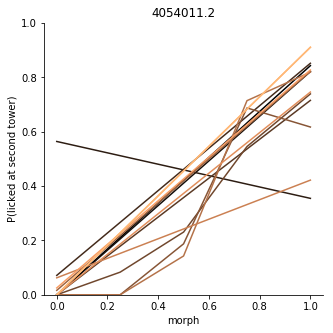

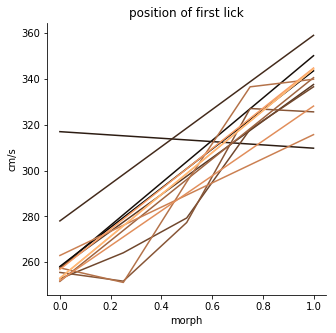

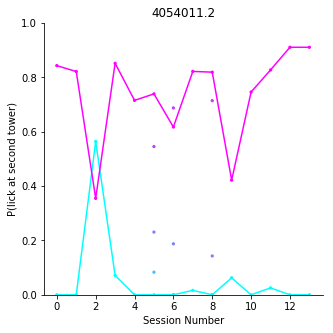

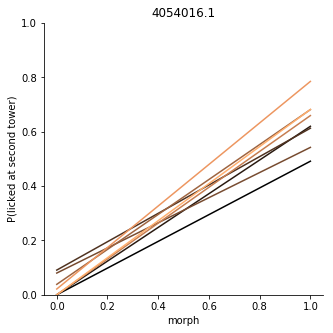

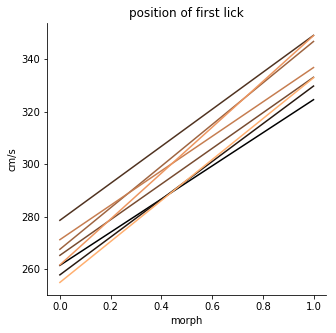

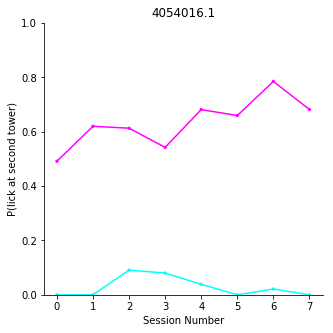

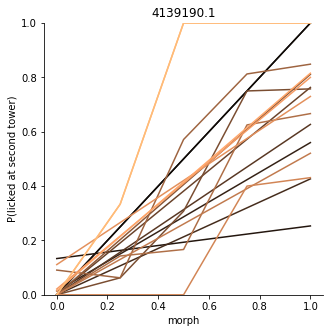

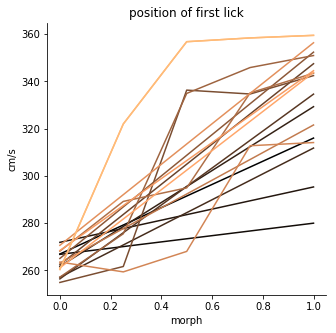

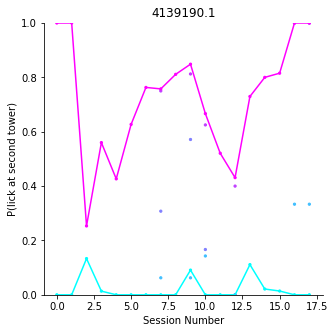

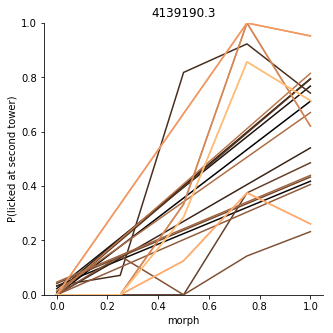

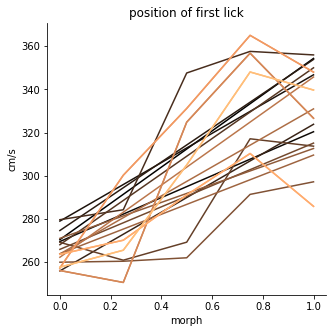

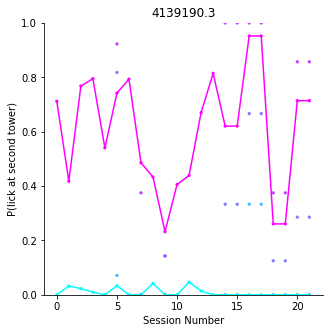

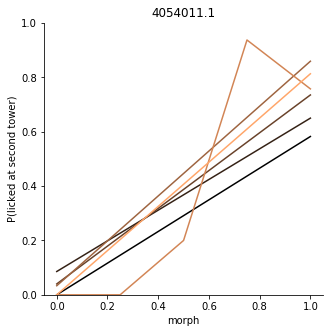

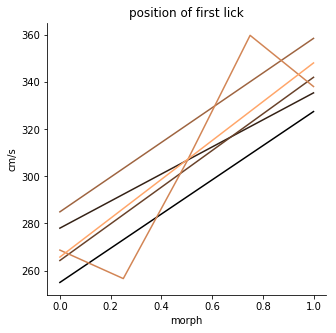

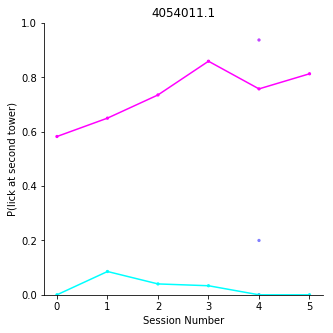

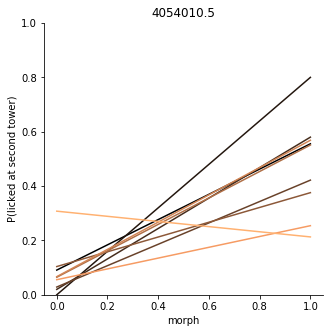

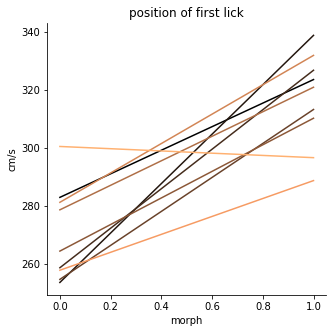

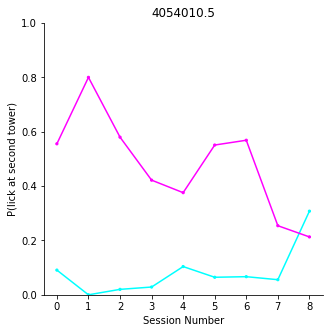

In [101]:
for mouse in ['4054011.2', '4054016.1', '4054206.1'] + ca1mice+dgmice:
    print(mouse)
    #  timeeout 
    df_TO = df[df['Track']=='TwoTower_Timeout']
    df_TO = df_TO[df_TO['MouseName'].str.match(mouse)]
    df_TO = df_TO[df_TO['DateTime']<'2018-07-15']
    df_TO = df_TO[df_TO['RewardCount']>30]
    #df_TO = df_TO.iloc[:,:]
    #df_TO = df_TO[df_TO['Imaging']==1]
    print(df_TO)
    
    # concatenate 
    if df_TO.shape[0]>0:
        data_TOs = behavior_dataframe([df_TO['data file'].iloc[i] for i in range(df_TO.shape[0])],concat=False)


        # correct for frame times
        N = len(data_TOs)
        f_pcntcorr,ax_pcntcorr = plt.subplots(figsize=[5,5])
        f_lp,ax_lp = plt.subplots(figsize=[5,5])
        f_sess, ax_sess = plt.subplots(figsize=[5,5])
        pcnt0, pcnt1 = [], []
        for i,data_TO in enumerate(data_TOs):

            trial_mat, bin_edges, bin_centers = make_pos_bin_trial_matrices(data_TO[['speed','morph','lick rate','reward','lick']]._values,
                                                          data_TO['pos']._values,
                                                          data_TO['tstart']._values,
                                                          data_TO['teleport']._values,bin_size=5)


            morph_vec,count = sp.stats.mode(trial_mat[:,:,1],axis=1,nan_policy='omit')
            morph_vec = np.squeeze(morph_vec)




            # plot licking behavior 
            trial_info = by_trial_info(data_TO)
            pcnt_mean = avg_by_morph(trial_info['morphs'],trial_info['pcnt'])
            
            pcnt0.append(pcnt_mean[0])
            pcnt1.append(pcnt_mean[-1])
            ax_sess.scatter(i*np.ones(pcnt_mean.shape),pcnt_mean,c=np.sort(np.unique(morph_vec)),s=5,cmap='cool')

           # morph_vals = np.arange(0,1.25,.25)
            ax_pcntcorr.plot(np.sort(np.unique(morph_vec)),pcnt_mean,color=plt.cm.copper(i/float(N)))
            #ax.plot(morph_vals,pcnt_mean_post,color='red')
            ax_pcntcorr.set_ylabel("P(licked at second tower)")
            ax_pcntcorr.set_xlabel("morph")
            ax_pcntcorr.set_ylim([0,1])
            ax_pcntcorr.spines['top'].set_visible(False)
            ax_pcntcorr.spines['right'].set_visible(False)
            ax_pcntcorr.set_title(mouse)
            
            
            
            licknans = np.isnan(trial_info['pos_lick']) & (trial_info['max_pos']<450) & (trial_info['max_pos']>245)
            trial_info['pos_lick'][licknans]=trial_info['max_pos'][licknans]
             #position of first lick
            pos_lick = avg_by_morph(trial_info['morphs'],trial_info['pos_lick'])
            
            ax_lp.plot(np.sort(np.unique(morph_vec)),pos_lick,color=plt.cm.copper(i/float(N)))
            #ax_lp.scatter(trial_info['morphs'],trial_info['pos_lick'],color=plt.cm.copper(i/float(N)),s=5)
            ax_lp.set_ylabel("cm/s")
            ax_lp.set_xlabel("morph")
            ax_lp.set_title("position of first lick")
            ax_lp.spines['top'].set_visible(False)
            ax_lp.spines['right'].set_visible(False)
            
        ax_sess.plot(np.arange(i+1),pcnt0,color=plt.cm.cool(0.))
        ax_sess.plot(np.arange(i+1),pcnt1,color=plt.cm.cool(1.))
        ax_sess.set_xlabel('Session Number')
        ax_sess.set_ylabel('P(lick at second tower)')
        ax_sess.set_title(mouse)
        ax_sess.spines['top'].set_visible(False)
        ax_sess.spines['right'].set_visible(False)
        ax_sess.set_ylim([0,1])
        
        #f_pcntcorr.savefig("G:\\My Drive\\CommitteeMeeting8_18\\Behavior\\TOLicks_Imaging\\%s_Plick2nd.png" % mouse,format='png')
        #f_lp.savefig("G:\\My Drive\\CommitteeMeeting8_18\\Behavior\\TOLicks_Imaging\\%s_FirstLick.png" % mouse, format = 'png')
        f_sess.savefig("G:\\My Drive\\CommitteeMeeting8_18\\Behavior\\TOLicks\\%s_LearningCurve.png" % mouse, format = 'png')

In [ ]:
print(trial)